## **Project Title: Diabetes Progression Prediction**  

### **Introduction**  
Diabetes is a chronic disease or serious health problem that affects many people around the world. If not detected early, it can cause severe health issues. In this project, we will build a machine learning or deep learning model to predict diabetes using [Early Stage Diabetes Risk Prediction Dataset](https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset). By analyzing different features like age, gender, and various symptoms like polyuria, polydipsia, and sudden weight loss, along with the target variable (Class: Positive/Negative), we can check if a person is at risk of diabetes.

### **Overview**  
This project involves an end-to-end machine learning pipeline, including Exploratory Data Analysis (EDA), feature engineering, model training, and evaluation. We will compare various machine learning techniques such as Logistic Regression, Neural Networks, Decision Trees, and Random Forests to determine the best-performing model. 

Here, are the short descriptions of each columns present in datasets:

1. **Age** – Patient's age (20 to 65 years).  
2. **Gender** – Male or Female.  
3. **Polyuria** – Excessive urination (Yes/No).  
4. **Polydipsia** – Excessive thirst (Yes/No).  
5. **Sudden Weight Loss** – Rapid weight loss (Yes/No).  
6. **Weakness** – Feeling of fatigue (Yes/No).  
7. **Polyphagia** – Excessive hunger (Yes/No).  
8. **Genital Thrush** – Fungal infection (Yes/No).  
9. **Visual Blurring** – Blurred vision (Yes/No).  
10. **Itching** – Skin irritation (Yes/No).  
11. **Irritability** – Frequent mood swings (Yes/No).  
12. **Delayed Healing** – Slow wound healing (Yes/No).  
13. **Partial Paresis** – Muscle weakness (Yes/No).  
14. **Muscle Stiffness** – Stiff or tight muscles (Yes/No).  
15. **Alopecia** – Hair loss (Yes/No).  
16. **Obesity** – Overweight condition (Yes/No).  
17. **Class** – Target variable (Positive: Diabetic, Negative: Non-Diabetic).  

### **Objectives**  
This project aims to build a predictive model for diabetes progression using a "Early Stage Diabetes Risk Prediction Dataset". We will explore different machine learning algorithms, evaluate their performance, and identify the most effective model for accurate predictions.

### **Step 1: Import Necessary Libraries and Load the Datasets**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import  accuracy_score, f1_score, classification_report, precision_score, confusion_matrix, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import joblib

import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### **Step 2: Basic Data Exploration**
Data exploration in ML is the process of examining our data to understand its structure, summary statistics, identify any missing values and visualize patterns before building a model.

In [2]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 520 rows and 17 columns.


In [4]:
# Check dataset columns names
print(f"Dataset contains {df.columns}")

Dataset contains Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [5]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [7]:
# Summary statistics
print(df.describe())

              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


In [8]:
# Check unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Polyuria: ['No' 'Yes']
Unique values in Polydipsia: ['Yes' 'No']
Unique values in sudden weight loss: ['No' 'Yes']
Unique values in weakness: ['Yes' 'No']
Unique values in Polyphagia: ['No' 'Yes']
Unique values in Genital thrush: ['No' 'Yes']
Unique values in visual blurring: ['No' 'Yes']
Unique values in Itching: ['Yes' 'No']
Unique values in Irritability: ['No' 'Yes']
Unique values in delayed healing: ['Yes' 'No']
Unique values in partial paresis: ['No' 'Yes']
Unique values in muscle stiffness: ['Yes' 'No']
Unique values in Alopecia: ['Yes' 'No']
Unique values in Obesity: ['Yes' 'No']
Unique values in class: ['Positive' 'Negative']


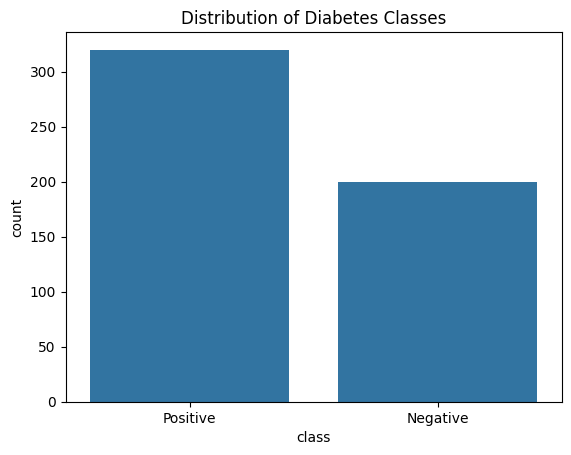

In [9]:
# Visualize the target variable distribution
sns.countplot(x='class', data=df)
plt.title('Distribution of Diabetes Classes')
plt.show()

### **Step 3: Advance Data Exploration using Exploratory Data Analysis(EDA)**
Exploratory Data Analysis (EDA) is the process of looking at our data to understand main features like patterns, trends and anomalies, using charts and summary statistics before going to deeper analysis or building models.

#### **Distribution of Class Column (Target Variable)**

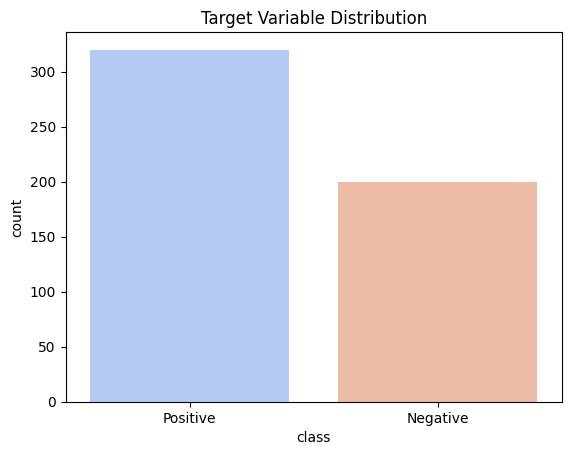

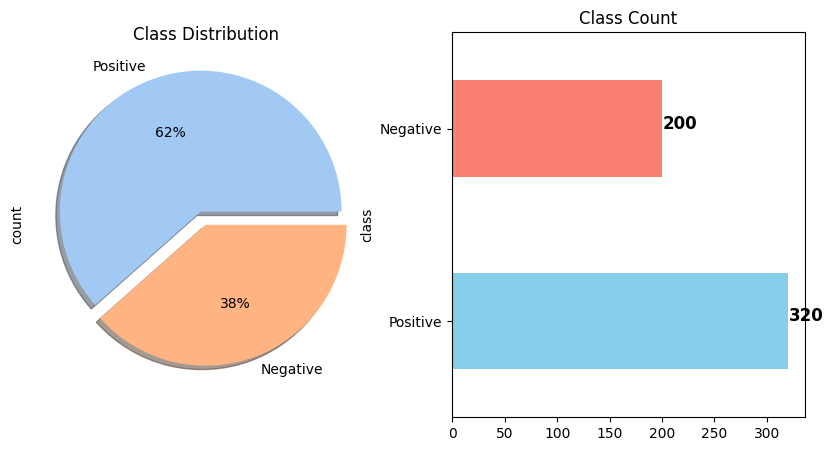

In [14]:
# Countplot for target variable
sns.countplot(x=df['class'], palette="coolwarm")
plt.title("Target Variable Distribution")
plt.show()

# Pie chart and bar plot side by side
plt.figure(figsize=(10, 5))

# Pie Chart
plt.subplot(1, 2, 1)
df["class"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"), 
                                    labels=["Positive", "Negative"], explode=[0.1, 0], shadow=True)
plt.title("Class Distribution")

# Bar Plot
plt.subplot(1, 2, 2)
ax = df["class"].value_counts().plot(kind="barh", color=["skyblue", "salmon"])
for i, v in enumerate(df["class"].value_counts()):
    ax.text(v + 1, i, str(v), fontsize=12, fontweight="bold")

plt.title("Class Count")
plt.show()

#### **1. Distribution of Age across the Class (Positive/Negative)**

In [55]:
# Find minimum and maximum age
min_age = df["Age"].min()
max_age = df["Age"].max()

# Calculate age range
age_range = max_age - min_age

print(f"Youngest Patient Age: {min_age}")
print(f"Oldest Patient Age: {max_age}")
print(f"Age Range: {age_range}")

Youngest Patient Age: 16
Oldest Patient Age: 90
Age Range: 74


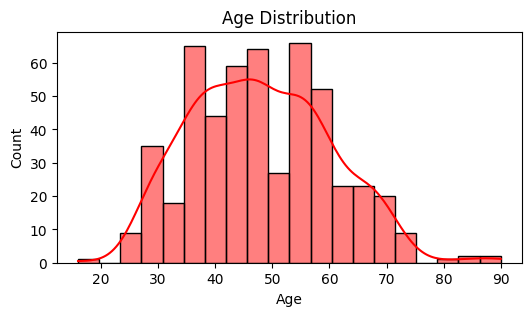

In [ ]:
# Histogram plot for Age distribution 
plt.figure(figsize=(6, 3))
sns.histplot(df["Age"], bins=20, kde=True, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

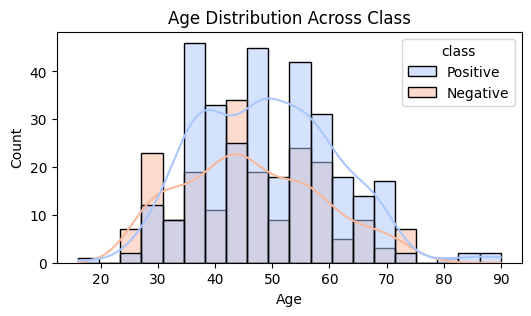

In [ ]:
# Histogram with KDE plot for Age distribution across the class
plt.figure(figsize=(6,3))
sns.histplot(df, x="Age", hue="class", kde=True, palette="coolwarm", bins=20)
plt.title("Age Distribution Across Class")
plt.xlabel("Age")
plt.ylabel("Count")

#### **2. Distribution of Gender across the Class (Positive/Negative)**

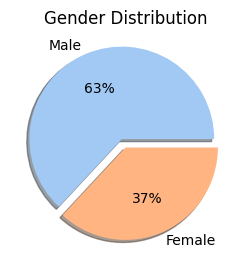

In [62]:
# Pie chart for Gender Distribution
plt.figure(figsize=(5, 3))
df["Gender"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                     labels=["Male", "Female"], explode=[0.1, 0], shadow=True)

plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


In [25]:
# Crosstab for Gender and Class Distribution (Percentage Format)
plot_criteria = ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)

crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


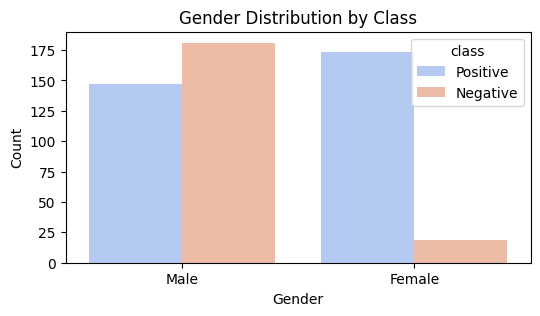

In [63]:
# Countplot for Gender Distribution across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Gender", hue="class", data=df, palette="coolwarm")
plt.title("Gender Distribution by Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### **3. Distribution of Polyuria(Excessive urination) across the Class (Positive/Negative)**

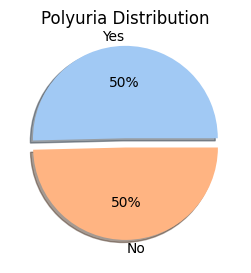

In [59]:
# Pie Chart for Polyuria Distribution
plt.figure(figsize=(5, 3))
df["Polyuria"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("pastel"),
                                       labels=["Yes", "No"], explode=[0.1, 0], shadow=True)
plt.title("Polyuria Distribution")
plt.ylabel("")
plt.show()

In [58]:
# Crosstab for Polyuria and Class
plot_criteria = ["Polyuria", "class"]
cm = sns.light_palette("red", as_cmap=True)
crosstab_result = round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize="columns") * 100, 2)
crosstab_result.style.background_gradient(cmap=cm)


class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


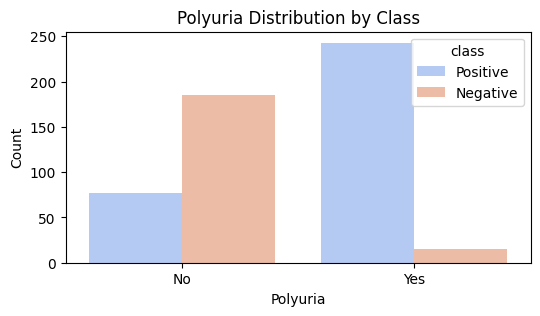

In [64]:
# Countplot for Polyuria across Class
plt.figure(figsize=(6, 3))
sns.countplot(x="Polyuria", hue="class", data=df, palette="coolwarm")
plt.title("Polyuria Distribution by Class")
plt.xlabel("Polyuria")
plt.ylabel("Count")
plt.show()

#### **4. Distribution of Polydipsia(Excessive thirst) across the Class (Positive/Negative)**

#### **5. Distribution of Sudden Weight Loss across the Class (Positive/Negative)**

#### **6. Distribution of Weakness across the Class (Positive/Negative)**

#### **7. Distribution of Polyphagia(Excessive hunger) across the Class (Positive/Negative)**

#### **8. Distribution of Genital Thrush(Fungal infection) across the Class (Positive/Negative)**

#### **9. Distribution of Visual Blurring(Blurred vision) across the Class (Positive/Negative)**

#### **10. Distribution of Itching(Skin irritation) across the Class (Positive/Negative)**

#### **10. Distribution of Itching(Skin irritation) across the Class (Positive/Negative)**

#### **11. Distribution of Irritability(Frequent mood swings) across the Class (Positive/Negative)**

#### **12. Distribution of Delayed Healing(Slow wound healing) across the Class (Positive/Negative)**

#### **13. Distribution of Partial Paresis(Muscle weakness) across the Class (Positive/Negative)**

#### **14. Distribution of Muscle Stiffness(Stiff or tight muscles) vs Class (Positive/Negative)**

#### **15. Distribution of Alopecia(Hair loss) vs Class (Positive/Negative)**

#### **16. Distribution of Obesity(Overweight condition) vs Class (Positive/Negative)**